In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

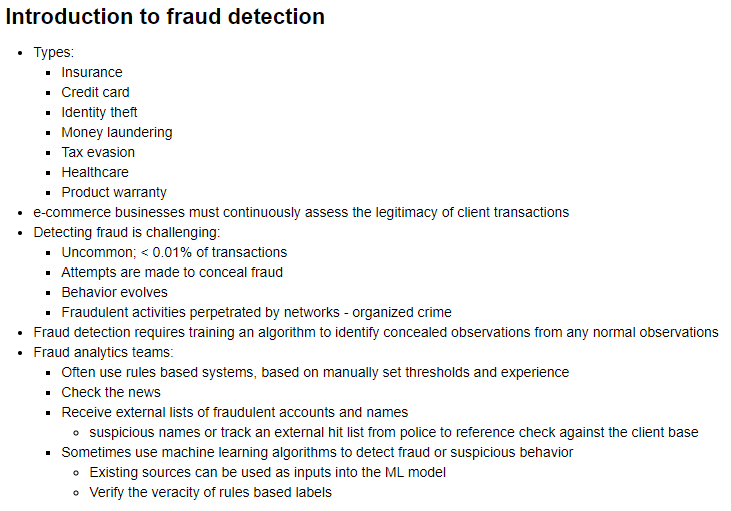
Source: https://trenton3983.github.io/files/projects/2019-07-19_fraud_detection_python/2019-07-19_fraud_detection_python.html

In [2]:
!pip install imblearn

In [3]:
# !pip install gensim

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
import seaborn as sns
from itertools import product
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
# import gensim
# from gensim import corpora
# import pyLDAvis.gensim

In [5]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 300)
pd.set_option('display.expand_frame_repr', True)

In [6]:
df = pd.read_csv('creditcard_sampledata_3.csv')
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,1.618952,-0.654046,-1.442665,-1.546538,-0.230008,1.785539,1.419793,0.071666,0.233031,0.275911,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,1.521570,0.499202,-0.127849,-0.237253,-0.752351,0.667190,0.724785,-1.736615,0.702088,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,-0.782780,0.005242,-1.273288,-0.269260,0.091287,-0.347973,0.495328,-0.925949,0.099138,-0.083859,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,0.137341,-0.156740,-0.429388,-0.752392,0.155272,0.215068,0.352222,-0.376168,-0.398920,0.043715,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,-0.963306,-0.228074,-0.324933,0.390609,1.065923,0.285930,-0.627072,0.170175,-0.215912,-0.147394,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [7]:
df.shape

(5050, 31)

In [8]:
# Checking the fraud to non-fraud ratio

In [9]:
# Explore the features available in your dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [10]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

0    5000
1      50
Name: Class, dtype: int64


In [11]:
# Print the ratio of fraud cases
ratio_cases = occ / len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non fraudulent cases {ratio_cases[0]}')

Ratio of fraudulent cases: 0.009900990099009901
Ratio of non fraudulent cases 0.9900990099009901


# Plotting data
We'll look at the data and visualize the fraud to non-fraud ratio. It is always a good starting point in your fraud analysis, 
to look at your data first, before you make any changes to it.

In [12]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [13]:
# Create a function to separate data in X and y (target)
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df['Class'].values
    return X,y
    

In [14]:
# Create X and y from the prep_data function 
X, y = prep_data(df)

In [15]:
y.shape

(5050,)

In [16]:
X.shape

(5050, 28)

In [17]:
type(X)

numpy.ndarray

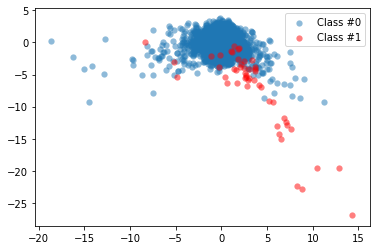

In [18]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

In [19]:
# Define function to ploting and comparing Scatters
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

# Reproduced using the DataFrame

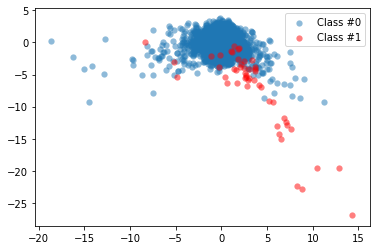

In [20]:
plt.scatter(df.V2[df.Class == 0], df.V3[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.V2[df.Class == 1], df.V3[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

# Increasing successful detections using data resampling

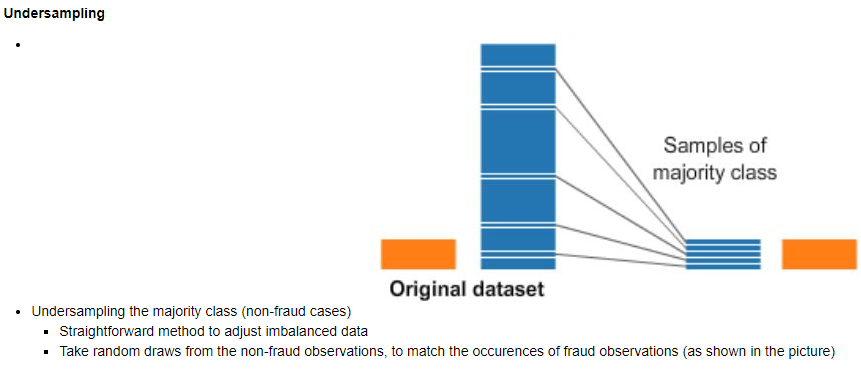

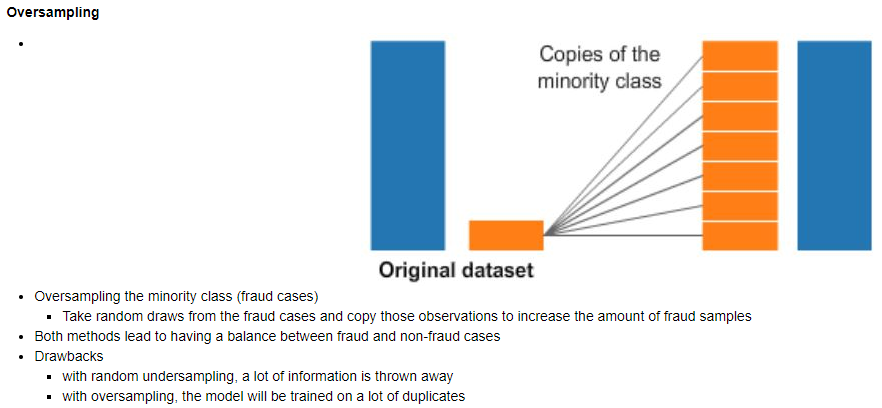

# Implement resampling methods using Python imblean module

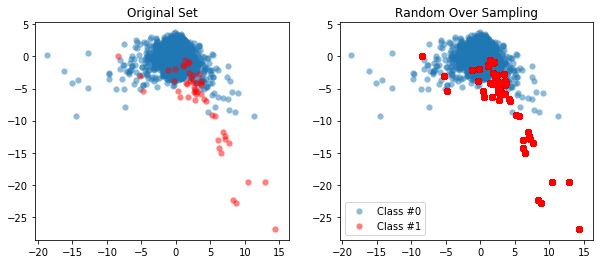

In [21]:
from imblearn.over_sampling import RandomOverSampler

method = RandomOverSampler()
X_resampled, y_resampled =  method.fit_sample(X, y)

compare_plot(X, y, X_resampled, y_resampled, 'Random Over Sampling')

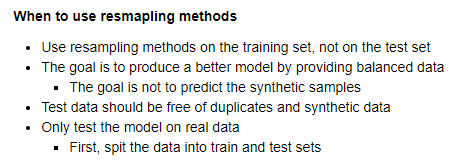

Synthetic minority Oversampling Technique (SMOTE)

Another way of adjusting the imbalance by oversampling minority observations
SMOTE uses characteristics of nearest neighbors of fraud cases to create new synthetic fraud cases
so avoiding duplicated observations.

# Fraud detection using labeled data

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

# Let's try SMOTE
# kind='regular'
method = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Get model performance metrics
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       0.75      1.00      0.86         6

    accuracy                           1.00      1010
   macro avg       0.88      1.00      0.93      1010
weighted avg       1.00      1.00      1.00      1010



Applying Synthetic Minority Oversampling Technique (SMOTE)
We're going to re-balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). 
Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar 
to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying 
observations, so let's apply SMOTE to our credit card data. We'll visualize the result and compare it to the original data, 
such that we can see the effect of applying SMOTE very clearly.

In [23]:
# Run the prep_data function
X, y = prep_data(df)

In [24]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (5050, 28)
y shape: (5050,)


In [25]:
# Define the resampling method
method = SMOTE()

In [26]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

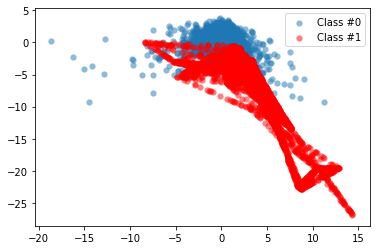

In [27]:
# Plot the resampled data
plot_data(X_resampled, y_resampled)

# Comparing SMOTE to original data

Let's compare those results to our original data, to get a good feeling for what has actually happened. 
Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. 

In [28]:
pd.value_counts(pd.Series(y))

0    5000
1      50
dtype: int64

In [29]:
pd.value_counts(pd.Series(y_resampled))

1    5000
0    5000
dtype: int64

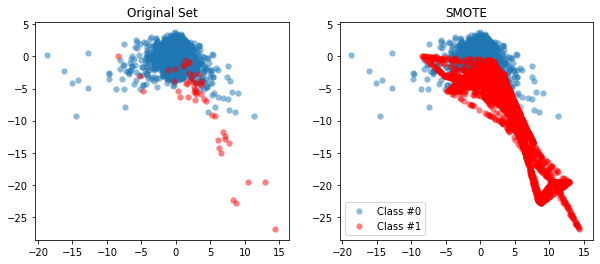

In [30]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

It should by now be clear that SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on the data very clearly. 

# Classification methods commonly used for fraud detection

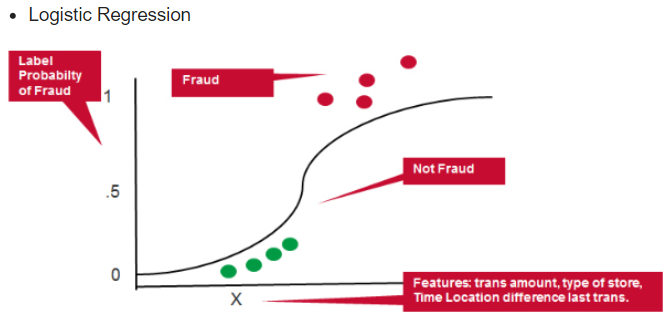

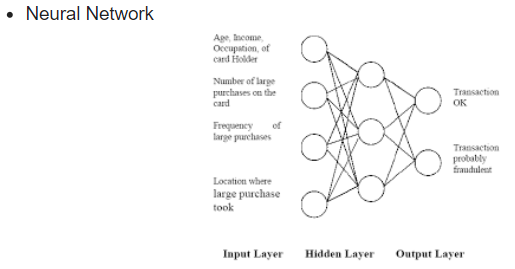

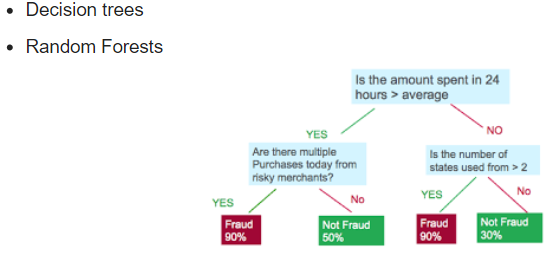

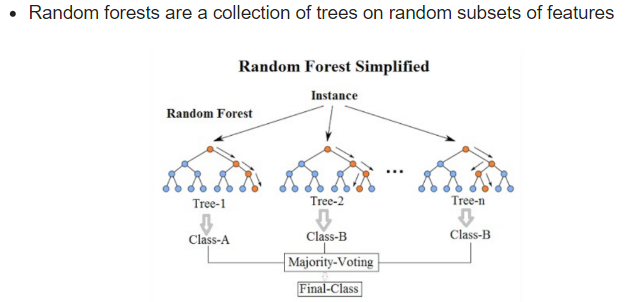

In [31]:
# Random Forests are a more robust option than a single decision tree

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

Accuracy Score:
0.998019801980198


In [33]:
df2 = pd.read_csv('creditcard_sampledata_2.csv') 

In [34]:
df2.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,-0.679089,-0.039671,1.372661,-0.732001,-0.344528,1.024751,0.380209,-1.087349,0.364507,0.051924,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,0.279973,0.885685,-0.583912,0.322019,-1.065335,-0.340285,-0.385399,0.216554,0.675646,-0.190851,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,-0.188235,-0.976779,0.560550,-0.250847,0.936115,0.136409,-0.078251,0.355086,0.127756,-0.163982,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,0.017562,0.285377,-0.818739,0.637991,-0.370124,-0.605148,0.275686,0.246362,1.331927,0.080978,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,-1.967998,-1.818338,-2.036184,0.346962,-1.161316,1.017093,-0.926787,0.183965,-2.102868,-0.354008,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [35]:
X, y = prep_data(df2)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (7300, 28)
y shape: (7300,)


In [36]:
X[0, :]

array([ 4.28408570e-01,  1.64002800e+00, -1.84885886e+00, -8.70902974e-01,
       -2.04848888e-01, -3.85675453e-01,  3.52792552e-01, -1.09830131e+00,
       -3.34596757e-01, -6.79088729e-01, -3.96709268e-02,  1.37266082e+00,
       -7.32000706e-01, -3.44528134e-01,  1.02475103e+00,  3.80208554e-01,
       -1.08734881e+00,  3.64507163e-01,  5.19236276e-02,  5.07173439e-01,
        1.29256539e+00, -4.67752261e-01,  1.24488683e+00,  6.97706854e-01,
        5.93750372e-02, -3.19964326e-01, -1.74444289e-02,  2.74400000e+01])

In [37]:
df2.Class.value_counts()

0    7000
1     300
Name: Class, dtype: int64

In [38]:
# Let's check what is the "natural" accuracy which we need to increase

In [39]:
# Count the total number of observations from the length of y
total_obs = len(y)
total_obs

7300

In [40]:
# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

7000

In [41]:
# Calculate the percentage of non fraud observations in the dataset
percentage = count_non_fraud/total_obs * 100
percentage = (float(count_non_fraud)/float(total_obs)) * 100 # print(f'{percentage:0.2f}%') also works

In [42]:
# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

95.8904109589041


This tells us that by doing nothing, we would be correct in 95.9% of the cases. So now you understand, that if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct. 
Let's see how a random forest does in predicting fraud in our data.

# Random Forest Classifier - part 1

In [43]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=20)

# Random Forest Classifier - part 2

In [45]:
# Let's see how our Random Forest model performs without doing anything special to it

In [46]:
# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [47]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [48]:
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
0.991


In [49]:
# As we can see, Random Forests do not tend to overfit, whereas Decision Trees do.

#  Performance evaluation
This time, we know accuracy can be misleading in the case of fraud detection. With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells us about the precision and recall of the model, whilst the confusion matrix actually shows how many fraud cases we can predict correctly.

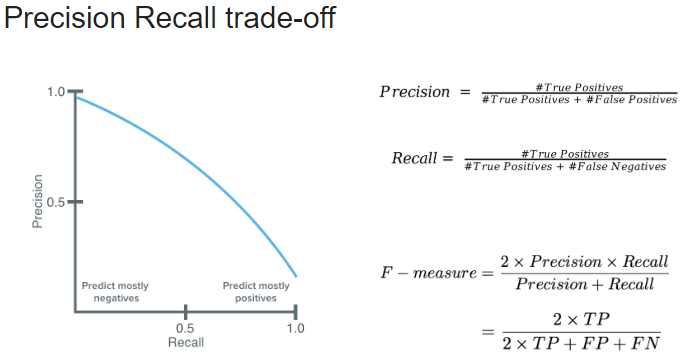

# Confusion matrix and classification report

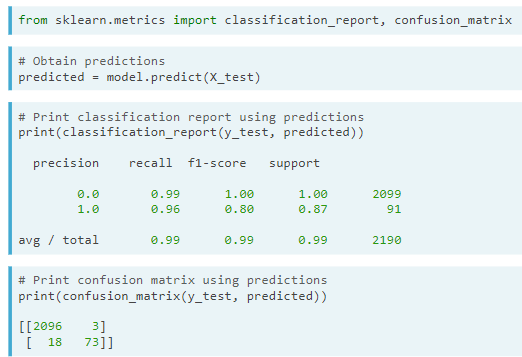

In [50]:
# import the methods
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
# precision, recall = precision_recall_curve(y_test, predicted)

In [51]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99148936 0.97333333]
recall: [0.99904717 0.8021978 ]
fscore: [0.99525392 0.87951807]
support: [2099   91]


#  Receiver Operating Characteristic (ROC) curve to compare algorithms
Created by plotting the true positive rate against the false positive rate at various threshold settings.

Useful for comparing performance of different algorithms

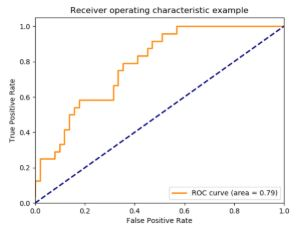

In [52]:
from sklearn import metrics
    
# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.9419896444670147


# Confusion matrix and classification report

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtain predictions
predicted = model.predict(X_test)

# Print classification report using predictions
print(classification_report(y_test, predicted))

# Print confusion matrix using predictions
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.97      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.98      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2097    2]
 [  18   73]]


We have now obtained more meaningful performance metrics that tell us how well the model performs, given the highly imbalanced data that we're working with. The model predicts 75 cases of fraud, out of which 73 are actual fraud. We have only 2 false positives. This is really good, and as a result we have a very high precision score. We do however, miss 18 cases of actual fraud. Recall is therefore not as good as precision.

# Plotting the Precision vs. Recall Curve
We can also plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in our model, otherwise we might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

In [54]:
# def plot_pr_curve
def plot_pr_curve(recall, precision, average_precision):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

In [55]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)
average_precision

0.7890250388880526

In [56]:
# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: [0.04155251 0.97333333 1.        ]
Recall: [1.        0.8021978 0.       ]


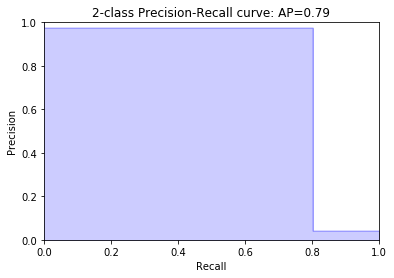

In [57]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# What's the benefit of the performance metric ROC curve (AUROC) versus Precision and Recall?
The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. 
Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers 
should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC 
curve is larger), they have better expected performance.

# Adjusting the algorithm weights

#  Hyperparameter tuning

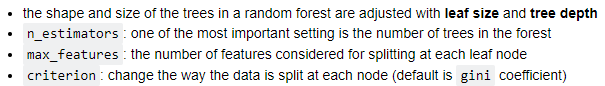

In [58]:
model = RandomForestClassifier(n_estimators=10, 
                               criterion='gini', 
                               max_depth=None, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               max_features='auto', 
                               n_jobs=-1, class_weight=None)

# GridSearchCV for hyperparameter tuning
'GridSearchCV evaluates all combinations of parameters defined in the parameter grid'

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid 
param_grid = {'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}

# Define which model to use
model = RandomForestRegressor()

# Instantiate the grid search model
grid_search_model = GridSearchCV(estimator = model, 
                                 param_grid = param_grid, 
                                 cv = 5,
                                 n_jobs = -1, 
                                 scoring='f1')

# Fit the grid search to the data
grid_search_model.fit(X_train, y_train)

# Get the optimal parameters 
grid_search_model.best_params_

# Get the best_estimator results
grid_search.best_estimator_
grid_search.best_score_

In [60]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9712788402640714
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  18   73]]


We can see that the model results don't improve drastically. We now have 3 less false positives, but now 19 in stead of 
18 false negatives, i.e. cases of fraud we are not catching. If we mostly care about catching fraud, and not so much about 
the false positives, this does actually not improve our model at all, albeit a simple option to try. We'll see how to more 
smartly tweak our model to focus on reducing false negatives and catch more fraud.

# Adjusting Random Forest to fraud detection
We're going to dive into the options for the random forest classifier, as we'll assign weights and tweak the shape of the decision trees in the forest. We'll define weights manually, to be able to off-set that imbalance slightly. In our case we have 300 fraud to 7000 non-fraud cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on.

In [61]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [62]:
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9609651901219315

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.97      0.85      0.91        91

    accuracy                           0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2097    2]
 [  14   77]]


We can see by smartly defining more options in the model, we can obtain better predictions. we have effectively reduced the number of false negatives, i.e. we are catching more cases of fraud, whilst keeping the number of false positives low. So far we've manually changed the options of the model. There is a smarter way of doing it, by using GridSearchCV.

# Parameter optimization with GridSearchCV

In [63]:
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

# Model results with GridSearchCV
Let's give this a try and see how well our model performs. We can use the get_model_results() function again to save time.


Input the optimal settings into the model definition.
Fit the model, obtain predictions and get the performance parameters with get_model_results().

In [64]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=8,
                               max_features='log2', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9749697658225529

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.95      0.84      0.89        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2095    4]
 [  15   76]]


The model has been improved even further. The number of false positives has now been slightly reduced even further, 
which means we are catching more cases of fraud. However, you see that the number of false positives actually went up. 
That is that Precision-Recall trade-off in action. To decide which final model is best, you need to take into account 
how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with. Ultimately, 
this final decision should be made by you and the fraud team together.

# Ensemble methods

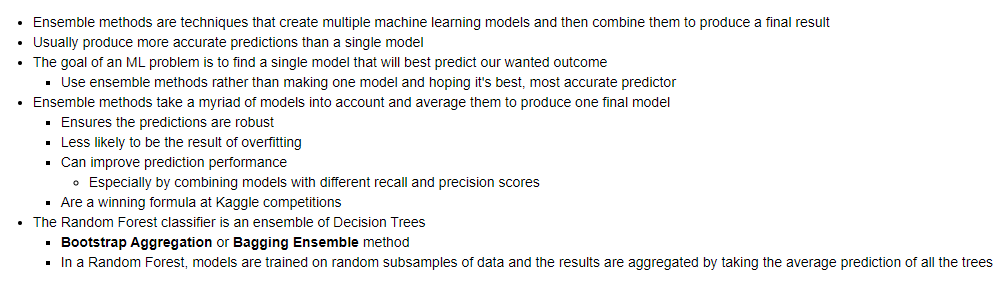

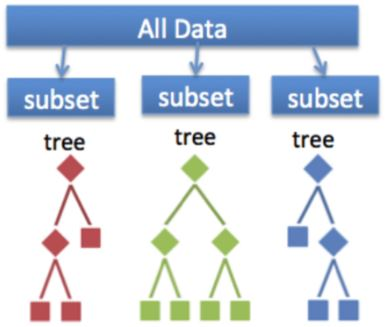

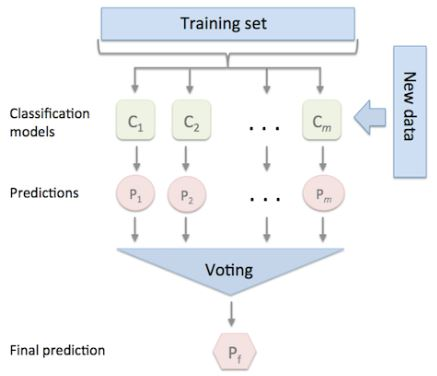

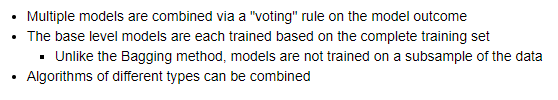

In [65]:
# Let's first check the performance of Logistic Regression algorithm
# Define a LogisticRegression model with class weights that are 1:15 for the fraud cases.
# Fit the model to the training set, and obtain the model predictions.
# Print the classification report and confusion matrix.

In [66]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9722054981702433

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2099
           1       0.63      0.88      0.73        91

    accuracy                           0.97      2190
   macro avg       0.81      0.93      0.86      2190
weighted avg       0.98      0.97      0.98      2190


Confusion Matrix:
[[2052   47]
 [  11   80]]


In [67]:
# Logistic Regression has quite different performance from the Random Forest. More false positives, but also a better Recall. 
# It will therefore will a useful addition to the Random Forest in an ensemble model.

Let's now combine three machine learning models into one, to improve our Random Forest fraud detection model from before. You'll combine our usual Random Forest model, with the Logistic Regression from the previous exercise, with a simple Decision Tree. You can use the short cut get_model_results() to see the immediate result of the ensemble model.

In [68]:
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=5,
                          solver='liblinear')

clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=5)

clf3 = DecisionTreeClassifier(random_state=5,
                              class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.90      0.86      0.88        91

    accuracy                           0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2090    9]
 [  13   78]]


You see that by combining the classifiers, you can take the best of multiple models. You've increased the cases of fraud you are catching from 76 to 78, and you only have 5 extra false positives in return. If you do care about catching as many fraud cases as you can, whilst keeping the false positives low, this is a pretty good trade-off. The Logistic Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false negatives. By combining these together you indeed managed to improve performance.

# Adjusting weights within the Voting Classifier
You've just seen that the Voting Classifier allows you to improve your fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights you can play with how much emphasis you give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

In [69]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', 
                                  weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

ROC Score:
0.9739279300975348

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.94      0.85      0.89        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2094    5]
 [  14   77]]


In [70]:
# The weight option allows you to play with the individual models to get the best final mix for your fraud detection model. 

# Now that we have finalized fraud detection with supervised learning, let's have a look at how fraud detetion can be done when we don't have any labels to train on.

#  Normal versus abnormal behavior

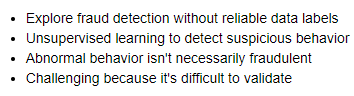

# What's normal behavior?

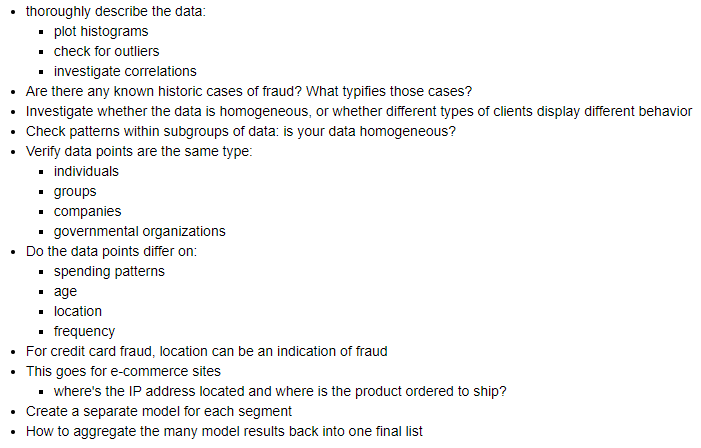

# Exploring the data
We will be looking at bank payment transaction data. The financial transactions are categorized by type of expense, as well as the amount spent. Moreover, we have some client characteristics available such as age group and gender. Some of the transactions are labeled as fraud; we'll treat these labels as given and will use those to validate the results.

When using unsupervised learning techniques for fraud detection, we want to distinguish normal from abnormal (thus potentially fraudulent) behavior. As a fraud analyst to understand what is "normal", we need to have a good understanding of the data and its characteristics. Let's explore the data.

In [71]:
banksim_df = pd.read_csv('banksim.csv')

In [72]:
banksim_df.drop(['Unnamed: 0'], axis=1, inplace=True)
banksim_adj_df = pd.read_csv('banksim_adj.csv')
banksim_adj_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [73]:
banksim_df.shape

(7200, 5)

In [74]:
banksim_df.head()

,age,gender,category,amount,fraud
0,3,F,es_transportation,49.71,0
1,4,F,es_health,39.29,0
2,3,F,es_transportation,18.76,0
3,4,M,es_transportation,13.95,0
4,2,M,es_transportation,49.87,0


In [75]:
banksim_adj_df.shape

(7189, 18)

In [76]:
banksim_adj_df.head()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
# Let's Group the data by transaction category and take the mean of the data.

In [78]:
banksim_df.groupby(['category']).mean()

,amount,fraud
category,,
es_barsandrestaurants,43.841793,0.022472
es_contents,55.170000,0.000000
es_fashion,59.780769,0.020619
es_food,35.216050,0.000000
es_health,126.604704,0.242798
es_home,120.688317,0.208333
es_hotelservices,172.756245,0.548387
es_hyper,46.788180,0.125000
es_leisure,229.757600,1.000000


In [79]:
# The majority of fraud is observed in travel, leisure and sports related transactions.

# Customer segmentation

We're going to check whether there are any obvious patterns for the clients in this data, thus whether you need to segment 
your data into groups, or whether the data is rather homogenous.

Unfortunately We don't have a lot client information available; we can't for example distinguish between the wealth levels 
of different clients. However, there is data on age available, so let's see whether there is any significant difference 
between behavior of age groups.

In [80]:
# Group the dataframe df by the category age and get the means for each age group.
banksim_df.groupby(['age']).mean()

,amount,fraud
age,,
0,49.468935,0.050000
1,35.622829,0.026648
2,37.228665,0.028718
3,37.279338,0.023283
4,36.197985,0.035966
5,37.547521,0.023990
6,36.700852,0.022293
U,39.117000,0.000000


In [81]:
# Count the values of each age group.
banksim_df.age.value_counts()

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

**Based on the results we see, it does not make sense to divide data into age segments before running a fraud detection algorithm. The age groups who are the largest are relatively similar. The average amount spent as well as fraud occurrence is rather similar across groups. Age group '0' stands out but since there are only 40 cases, it does not make sense to split these out in a separate group and run a separate model on them.**

# Using statistics to define normal behavior

**We saw that fraud is more prevalent in certain transaction categories, but that there is no obvious way to segment our data into for example age groups. This time, let's investigate the average amounts spent in normal transactions versus fraud transactions. This gives you an idea of how fraudulent transactions differ structurally from normal transactions.**

* Create two new dataframes from fraud and non-fraud observations. Locate the data in df with .loc and assign the condition "where fraud is 1" and "where fraud is 0" for creation of the new dataframes.
* Plot the amount column of the newly created dataframes in the histogram plot functions and assign the labels fraud and nonfraud respectively to the plots.

In [82]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = banksim_df[banksim_df.fraud == 1] 
df_non_fraud = banksim_df[banksim_df.fraud == 0]

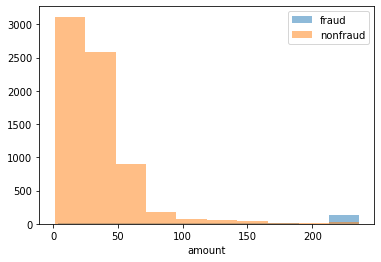

In [83]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.xlabel('amount')
plt.legend()
plt.show()

**As the number fraud observations is much smaller, it is difficult to see the full distribution. Nonetheless, you can see that the fraudulent transactions tend to be on the larger side relative to normal observations. This is good news, as it helps us later in detecting fraud from non-fraud.**

# Clustering methods to detect fraud

**K-means clustering**

* The objective of any clustering model is to detect patterns in the data. More specifically, to group the data into distinct clusters made of data points that are very similar to each other, but distinct from the points in the other clusters.
* The objective of k-means is to minimize the sum of all distances between the data samples and their associated cluster centroids
* The score is the inverse of that minimization, so the score should be close to 0.

* It's of utmost importance to scale the data before doing K-means clustering, or any algorithm that uses distances
* Without scaling, features on a larger scale will weight more heavily in the algorithm. All features should weigh equally at the initial stage
* fix random_state so models can be compared

In [84]:
# Import the packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Transform and scale your data
X = np.array(df).astype(np.float)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the k-means model and fit to the data
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_scaled)

**The right amount of clusters**

* There are multiple ways to check what the right number of clusters should be
    * Silhouette method
    * Elbow curve
* By running a k-means model on clusters varying from 1 to 10 and generate an elbow curve by saving the scores for each model under "score".
* Plot the scores against the number of clusters

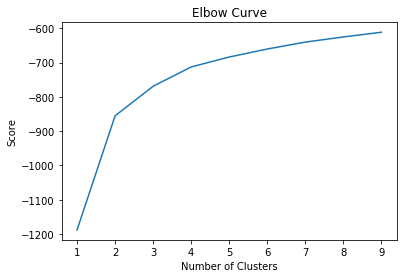

In [85]:
clust = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in clust]

score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

plt.plot(clust,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**The slight elbow at 3 means that 3 clusters could be optimal, but it's not very pronounced.**

**Or using the inertia of the model to double check**

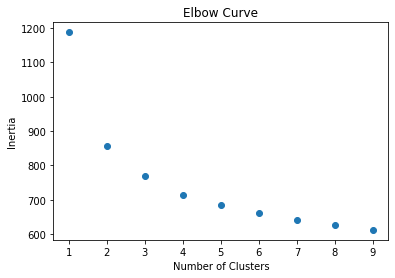

In [86]:
ks = range(1, 10) 
model = [KMeans(n_clusters=i) for i in ks]
inertias = [kmeans[i].fit(X_scaled).inertia_ for i in range(len(model))]
plt.plot(ks,inertias, 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

**By using inertias, the elbow results at 4, which means that 4 clusters could be optimal!**

#  Scaling the data

For ML algorithms using distance based metrics, it is crucial **to always scale your data**, as features using different scales will distort your results. K-means uses the Euclidean distance to assess distance to cluster centroids, therefore you first need to scale your data before continuing to implement the algorithm. 

* Import the MinMaxScaler.
* Transform your dataframe df into a numpy array X by taking only the values of df and make sure you have all float values.
* Apply the defined scaler onto X to obtain scaled values of X_scaled to force all your features to a 0-1 scale.

In [87]:
labels = banksim_adj_df.fraud

In [88]:
cols = ['age', 'amount', 'M', 'es_barsandrestaurants', 'es_contents',
        'es_fashion', 'es_food', 'es_health', 'es_home', 'es_hotelservices',
        'es_hyper', 'es_leisure', 'es_otherservices', 'es_sportsandtoys',
        'es_tech', 'es_transportation', 'es_travel']

In [89]:
# Take the float values of df for X
X = banksim_adj_df[cols].values.astype(np.float)

In [90]:
X.shape

(7189, 17)

In [91]:
# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**A very commonly used clustering algorithm is K-means clustering. For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. It is a good algorithm to start with when working on fraud detection problems. However, fraud data is oftentimes very large, especially when you are working with transaction data. MiniBatch K-means is an efficient way to implement K-means on a large dataset, which you will use in this exercise.**

In [92]:
# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

# Elbow method

* Define the range to be between 1 and 10 clusters.
* Run MiniBatch K-means on all the clusters in the range using list comprehension.
* Fit each model on the scaled data and obtain the scores from the scaled data.
* Plot the cluster numbers and their respective scores.

In [93]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

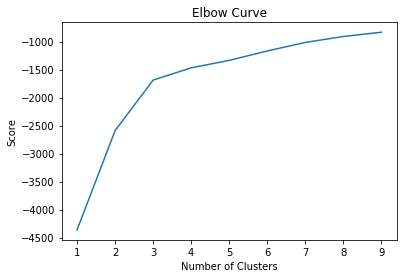

In [94]:
# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**Now you can see that the optimal number of clusters should probably be at around 3 clusters, as that is where the elbow is in the curve. We'll use this in the next exercise as our baseline model, and see how well this does in detecting fraud**

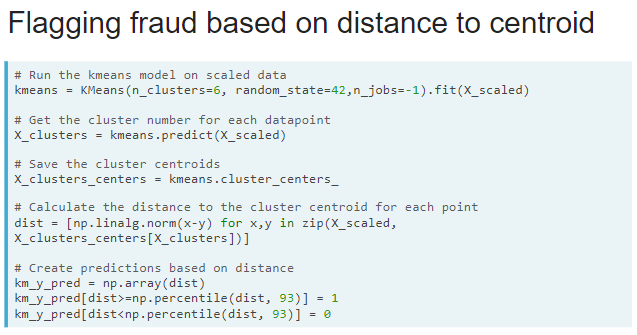

# Assigning fraud versus non-fraud


* Work closely with the fraud expert to check the best way to assign fraud cases 
* Investigate and describe cases that are flagged in more detail
* Compare to past known cases of fraud (Check if the model can predict them!)

* np.linalg.norm: returns the vector norm, the vector of distance for each datapoint to their assigned cluster
* use the percentiles of the distances to determine which samples are outliers

In [95]:
# Run the kmeans model on scaled data
kmeans = KMeans(n_clusters=6, random_state=42,n_jobs=-1).fit(X_scaled)

# Get the cluster number for each datapoint
X_clusters = kmeans.predict(X_scaled)

# Save the cluster centroids
X_clusters_centers = kmeans.cluster_centers_

# Calculate the distance to the cluster centroid for each point
dist = [np.linalg.norm(x-y) for x,y in zip(X_scaled, X_clusters_centers[X_clusters])]

# Create predictions based on distance
km_y_pred = np.array(dist)
km_y_pred[dist>=np.percentile(dist, 93)] = 1
km_y_pred[dist<np.percentile(dist, 93)] = 0

# Validating the Model Results

* without fraud labels, the usual performance metrics can't be run
    * check with the fraud analyst
    * investigate and describe cases that are flagged in more detail
        * is it fraudulent or just a rare case of legit data
        * mavoid rare, legit cases by deleting certain features or removing the cases from the data
    * if there are past cases of fraud, see if the model can predict them using historic data

#  Detecting outliers

We're going to use the K-means algorithm to predict fraud, and compare those predictions to the actual labels that are saved, to sense check our results.

The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid. We'll learn how to do this and how to determine the cut-off. 

* Split the scaled data and labels y into a train and test set.
* Define the MiniBatch K-means model with 3 clusters, and fit to the training data.
* Get the cluster predictions from your test data and obtain the cluster centroids.
* Define the boundary between fraud and non fraud to be at 95% of distance distribution and higher.

In [96]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

# Checking model results

* Obtain the area under the ROC curve from your test labels and predicted labels.

In [97]:
# Define plot function

In [98]:
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    From:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-
        examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [99]:
# Obtain the ROC score
roc_auc_score(y_test, km_y_pred)

0.8109115999408585

* Obtain the confusion matrix from the test labels and predicted labels and plot the results.

Confusion matrix, without normalization


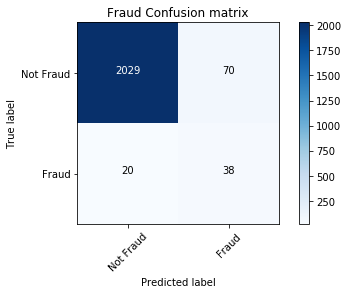

In [100]:
# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm)

#  Alternate clustering methods for fraud detection

* In addition to K-means, there are many different clustering methods, which can be used for fraud detection
* K-means works well when the data is clustered in normal, round shapes
* There are methods to flag fraud other the cluster outliers
* Small clusters can be an indication of fraud
* This approach can be used when fraudulent behavior has commonalities, which cause clustering
* The fraudulent data would cluster in tiny groups, rather than be the outliers of larger clusters

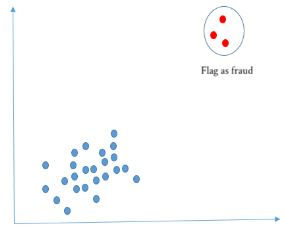

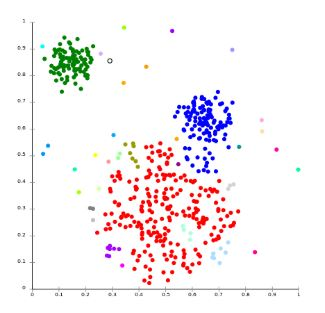

* In this case there are 3 obvious clusters
* The smallest dots are outliers and outside of what can be described as normal behavior
* There are also small to medium clusters closely connected to the red cluster
* Visualizing the data with something like PCA can be quite helpful

# DBSCAN: Density-Based Spatial Clustering of Applications with Noise

This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.

* No need to predefine amount of clusters
* Adjust maximum distance between points within clusters
* Assign minimum amount of samples in clusters
* Better performance on weirdly shaped data
* But..higher computational costs (Computationally heavier then MiniBatch K-means)

In [110]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=10, n_jobs=-1).fit(X_scaled)

# Get the cluster labels (aka numbers)
pred_labels = db.labels_

# Count the total number of clusters
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

# Print model results
print(f'Estimated number of clusters: {n_clusters_}')

print(f'Homogeneity: {homogeneity_score(labels, pred_labels):0.3f}')

# Print model results
print(f'Silhouette Coefficient: {metrics.silhouette_score(X_scaled, pred_labels):0.3f}')

# Get sample counts in each cluster 
counts = np.bincount(pred_labels[pred_labels>=0])
print(counts)

Estimated number of clusters: 22
Homogeneity: 0.611
Silhouette Coefficient: 0.712
[3252  145 2714   55  174  119  122   98   54   13   76   43   25   51
   47   42   15   15   19   23   18   10]


**The number of clusters is much higher than with K-means. For fraud detection this is for now OK, as we are only interested in the smallest clusters, since those are considered as abnormal. Now let's have a look at those clusters and decide which one to flag as fraud.**

# Assessing smallest clusters

We're going to have a look at the clusters that came out of DBscan, and flag certain clusters as fraud:

    * first we need to figure out how big the clusters are, and filter out the smallest
    * take the smallest ones and flag those as fraud
    * last, check with the original labels whether this does actually do a good job in detecting fraud.

In [102]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  145 2714   55  174  119  122   98   54   13   76   43   25   51
   47   42   15   15   19   23   18   10]


In [103]:
# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

In [104]:
# Print the results 
print(f'The smallest clusters are clusters: {smallest_clusters}')

The smallest clusters are clusters: [21  9 17]


In [105]:
# Print the counts of the smallest clusters only
print(f'Their counts are: {counts[smallest_clusters]}')

Their counts are: [10 13 15]


So now we know which smallest clusters you could flag as fraud. If you were to take more of the smallest clusters, you cast your net wider and catch more fraud, but most likely also more false positives. It is up to the fraud analyst to find the right amount of cases to flag and to investigate. In the next exercise you'll check the results with the actual labels.

# Results verification

We're going to check the results of your DBscan fraud detection model. In reality, you often don't have reliable labels and this where a fraud analyst can help you validate the results. He/She can check your results and see whether the cases you flagged are indeed suspicious. You can also check historically known cases of fraud and see whether your model flags them.

In this case, you'll use the fraud labels to check your model results.

* Create a dataframe combining the cluster numbers with the actual labels.
* Create a condition that flags fraud for the three smallest clusters: clusters 21, 17 and 9.
* Create a crosstab from the actual fraud labels with the newly created predicted fraud labels.

In [106]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr'].isin([21, 17, 9])), 1 , 0)

In [107]:
# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6976  13
1               175  25


How does this compare to the K-means model? The good thing is: out of all flagged cases, roughly 2/3 are actually fraud! Since you only take the three smallest clusters, by definition you flag less cases of fraud, so you catch less but also have less false positives. However, you are missing quite a lot of fraud cases. Increasing the amount of smallest clusters you flag could improve that, at the cost of more false positives of course. In the next chapter you'll learn how to further improve fraud detection models by including text analysis.

# Fraud detection using text

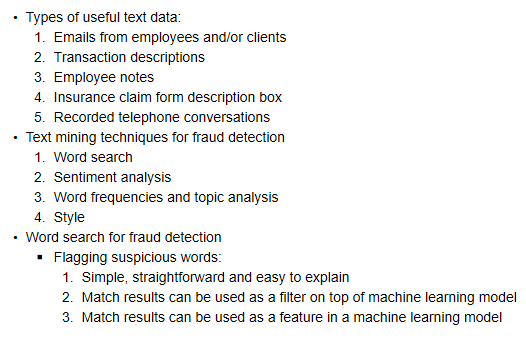

In [112]:
df = pd.read_csv(r'enron_emails_clean.csv')

In [113]:
df.head()

,Message-ID,From,To,Date,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...


In [114]:
# Word counts to flag fraud with pandas
# Using a string operator to find words
df['content'].str.contains('money laundering')

0       False
1       False
2       False
3       False
4       False
        ...  
2085    False
2086    False
2087    False
2088    False
2089    False
Name: content, Length: 2090, dtype: bool

In [115]:
# Select data that matches 
df.loc[df['content'].str.contains('money laundering', na=False)]

,Message-ID,From,To,Date,content,clean_content


In [116]:
# Create a list of words to search for
list_of_words = ['police', 'money laundering']
df.loc[df['content'].str.contains('|'.join(list_of_words), na=False)]

,Message-ID,From,To,Date,content,clean_content
154,<6336501.1075841154311.JavaMail.evans@thyme>,('sarah.palmer@enron.com'),('sarah.palmer@enron.com'),2002-02-01 14:53:35,\nJoint Venture: A 1997 Enron Meeting Belies O...,joint venture enron meeting belies officers cl...
265,<8804305.1075843407724.JavaMail.evans@thyme>,('ann.schmidt@enron.com'),('ann.schmidt@enron.com'),2001-03-29 08:00:00,US-Based Enron Corp Expands Pulp And Paper Ops...,us based enron corp expands pulp paper ops asi...
383,<8004159.1075855852710.JavaMail.evans@thyme>,('shona.wilson@enron.com'),('shona.wilson@enron.com'),2000-10-11 11:48:00,"Dear Mike,\n\nThanks for your insight. In the...",dear mike thanks insight past months establish...
442,<19511364.1075853114036.JavaMail.evans@thyme>,('jordan.w.cowman@bakernet.com'),('jordan.w.cowman@bakernet.com'),2001-07-02 14:24:16,I am pleased to send you our web-based e-mail ...,pleased send web based e mail alert prepared b...
1196,<20882659.1075845226215.JavaMail.evans@thyme>,('clickz.today.txt@my.clickz.com'),('clickz.today.txt@my.clickz.com'),2001-06-07 16:30:14,||||||||||||||||||||||||||||||||||||||||||||||...,c l c k z thursday june internet leading resou...
1228,<14494563.1075861149693.JavaMail.evans@thyme>,('txbarnesj@aol.com'),('txbarnesj@aol.com'),2002-01-22 17:33:33,"Well Neighbors,\nIt has happened to us as well...",well neighbors happened us well guest staying ...
1782,<15663798.1075858728962.JavaMail.evans@thyme>,('cp-del@nationaljournal.com'),('cp-del@nationaljournal.com'),2001-10-24 22:40:08,National Journal's CongressDaily\nIssue date: ...,national journal congressdaily issue date octo...


In [117]:
# Create a fraud flag 
df['flag'] = np.where((df['content'].str.contains('|'.join(list_of_words)) == True), 1, 0)

In [118]:
df.head()

,Message-ID,From,To,Date,content,clean_content,flag
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...,0
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...,0
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...,0
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...,0
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...,0
